# Jupiter's Moons Analysis (Task 1)

### Introduction:
In this notebook, we will explore and analyse the dataset of Jupiter's moons. Jupiter, the largest planet in our Solar System, is known for having a large number of moons, each with unique characteristics and orbital properties. Our analysis aims to discover insights into these moons, by using the `Moons` class from the `jupiter.py` module, specifically developed for this purpose.

The dataset includes various attributes of the moons such as their orbital period, distance from Jupiter, physical dimensions, and more. Through this analysis, we hope to understand more about these celestial bodies and their relationships with Jupiter.

### Loading the data
To load the data, we import the "Moons" class from the "jupiter.py" model, and we create a database path to load the database here

In [8]:
from jupiter import Moons

In [2]:
db_path = "data/jupiter.db"
moons_data = Moons(db_path)

### Dataset Structure
Let's discuss the overall structure of our dataset. We'll look into the number of fields and records to get a sense of its size and scope.


In [3]:
# Display the shape of the dataset
num_records, num_fields = moons_data.data.shape
print(f"The dataset contains {num_records} records and {num_fields} fields.")


The dataset contains 56 records and 9 fields.


### Checking Data Completeness
To ensure the reliability of our analysis, it's important to check for missing values in the dataset. The `check_completeness` method helps us identify if there are any gaps in our data.


In [4]:
# Check for missing values in the dataset
moons_data.completeness()


moon                0
period_days         0
distance_km         0
radius_km           0
mag                 3
mass_kg            50
group               0
ecc                 0
inclination_deg     0
dtype: int64

It seems that there are 3 empty data from the "mag" column, and 50 missing data from the mass_kg column, so we are notified of the missing values before we proceed to the next step


### Summary Statistics
Let's start by looking at the summary statistics of the dataset. This will give us a good overview of the numerical attributes of Jupiter's moons.


In [5]:
# Display summary statistics
moons_data.summary_statistics()

,period_days,distance_km,radius_km,mag,mass_kg,ecc,inclination_deg
count,56.000000,5.600000e+01,56.000000,53.000000,6.000000e+00,56.000000,56.000000
mean,525.998146,1.775655e+07,158.969643,20.418302,6.551798e+22,0.222922,113.571607
std,272.670243,8.253688e+06,557.730632,4.926587,6.010469e+22,0.126899,64.562822
min,0.290000,1.280000e+05,1.000000,4.610000,2.080000e+18,0.000200,0.030000
25%,258.750000,1.170252e+07,1.500000,20.800000,1.200276e+22,0.159201,30.582500
50%,632.500000,2.129009e+07,2.000000,22.500000,6.865891e+22,0.228000,148.600000
75%,725.500000,2.336375e+07,11.562500,23.000000,1.030252e+23,0.298858,159.175000
max,787.000000,2.458309e+07,2634.100000,23.700000,1.481900e+23,0.611016,166.200000


According to the summary statistics, we can obtain many information about these moons, such as the mean, minimum and maximum value of these attributes. There's a lot of things we can derive from these statistics. For example:

#### 1) "period_days" (Orbital period of moons in days)
The orbital periods of the moon are vastly different from each other, from as minimum as 0.29 days to 787 days, showing diversity in orbital dynamics.

#### 2) "distance_km" (Distance of moons from Jupiter in km)
Range of distances in kilometers are from 128000 km to 24583090 km, highlighting the huge distribution of the moons around Jupiter. A high standard deviation of 8.25 million km indicates the moon are spread out over a large range of distances from Jupiter.

#### 3) "radius_km" (Radius of moons)
Radius of the moons varies from 1 km to 2634.1 km, showing that moons have variety in size. The mean (approximately 159 km) is much closer to the minimum, indicating that most moons are relatively small compared to the large ones

From these analytics, we can conclude that there's a significant diversity in orbital periods, distances, and radius, indicating a complex system of moons with varied orbital characteristics and different sizes.


### Correlation Analysis
Understanding how different numerical attributes of the moons correlate with each other can provide valuable insights. We use the `correlation` method for this purpose. Additionally, we'll visualize these correlations using a heatmap.


/home/jovyan/PDA/Assessment 1/jupiter.py:40: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = self.data.corr()


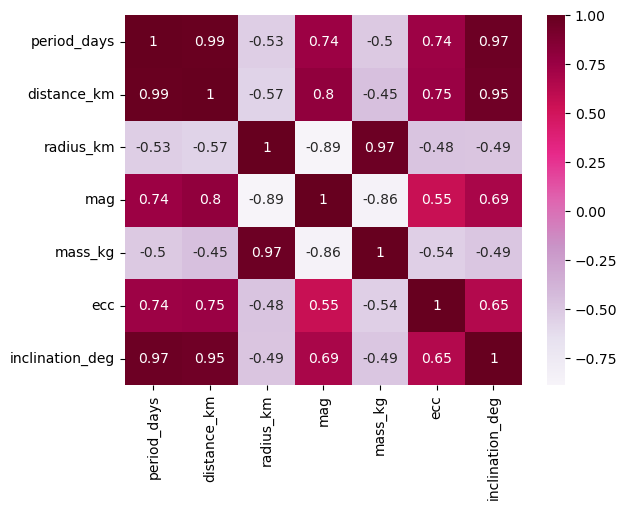

,period_days,distance_km,radius_km,mag,mass_kg,ecc,inclination_deg
period_days,1.000000,0.991521,-0.534434,0.742646,-0.504430,0.737181,0.969493
distance_km,0.991521,1.000000,-0.567266,0.799187,-0.453339,0.750819,0.953873
radius_km,-0.534434,-0.567266,1.000000,-0.887393,0.968379,-0.478901,-0.487645
mag,0.742646,0.799187,-0.887393,1.000000,-0.861359,0.554617,0.688529
mass_kg,-0.504430,-0.453339,0.968379,-0.861359,1.000000,-0.543138,-0.489378
ecc,0.737181,0.750819,-0.478901,0.554617,-0.543138,1.000000,0.645961
inclination_deg,0.969493,0.953873,-0.487645,0.688529,-0.489378,0.645961,1.000000


In [6]:
moons_data.correlation(visualise = True)

Before we delve into the correlation analysis, let's understand what correlation values are:

#### Understanding correlation values

- A correlation value close to +1 indicates a strong positive relationship.
- A value close to -1 indicates a strong negative relationship.
- Values near 0 suggest little to no linear relationship.

Now we analyse each of the correlations:

#### 1. "period_days" and "distance_km" (0.991521)
A value of 0.991521 indicates a very strong positive relationship between these two characteristics, in a way suggests that moons that are far from Jupiter have longer orbital periods. According to Kepler's Third Law, the square of a planet's orbital period, T, is proportional to the cube of the length of the semi-major axis, a, of its orbit, which is consistent with the correlation we obtained.

#### 2. "radius_km" and "mass_kg" (0.96837)
This very high value of correlation (0.96837) suggests that larger moons have larger mass, which is expected as larger bodies generally have greater volumes and higher mass. 

#### 3. "radius_km" and 'mag' (-0.887393)
This negative value indicates that radius and magnitude has negative relationship. This suggests that larger-sized moons have lower magnitudes, meaning that they appear brighter from the observer in Earth. Since magnitude in astronomy is inversely related to brightness, this makes sense - larger moons reflecting more light could appear brighter.

#### Key takeaways
- The strong correlation between orbital period and distance from Jupiter aligns well with Kepler's Third Law.
- Larger and more massive moons tend to be brighter, as indicated by their negative correlation with magnitude.





### Retrieving Data for a Specific Moon
If we want to focus our analysis on a specific moon, we can use the `get_moon_data` method. Let's retrieve data for the moon "Ganymede".This moon is particularly interesting because it's not only the largest moon of Jupiter but also the largest moon in the entire Solar System. It's even larger than the planet Mercury.


In [9]:
# Retrieve data for "Ganymede"
moons_data.get_moon_data('Ganymede')


,moon,period_days,distance_km,radius_km,mag,mass_kg,group,ecc,inclination_deg
24,Ganymede,7.15,1070400.0,2634.1,4.61,1.481900e+23,Galilean,0.0013,2.2


### Analysis of Ganymede

#### 1. Orbital Period (period_days)
With an orbital period spanning only 7.15 days, Ganymede completes its journey around Jupiter relatively quickly, especially when you consider its distance from the planet.

#### 2. Proximity to Jupiter (distance_km)
Ganymede orbits at a distance of about 1,070,400 kilometers from Jupiter. This substantial distance places it among the Galilean moons, a group characterized by their large sizes and significant distances from Jupiter.

#### 3. Orbital Shape (ecc)
The orbital eccentricity of Ganymede is measured at a mere 0.0013, indicating that its path around Jupiter is almost a perfect circle, with only a slight deviation.

#### 4. Orbital Tilt (inclination_deg)
The inclination of Ganymede’s orbit is just 2.2 degrees. This suggests that its orbit aligns closely with the equatorial plane of Jupiter, implying only a minor angular deviation.




